In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from dateutil.parser import parse
from itertools import compress
from collections import OrderedDict
from datetime import date
import datetime
import re
from datetime import timedelta
import openpyxl
from sklearn.metrics import mean_squared_error
import plotly.express as px

import os
import re
import seaborn as sns

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

In [5]:
for root, dirs, files in os.walk(r'D:'):
    for filename in files:
        if filename.endswith('.xlsx'):
            print (os.path.join(root, filename))

In [130]:
filepath_TO = r'\\THGOBNA002\thpal\05 Production\302 Management - Report\TNH-302-101 Shift Turnover (THPAL)\Production Daily Report\Process B\2020\07 July\000 Shift Turnover'

In [6]:
columns = ['A', 'B', 'C','D','E','F','G','H','R','S','T','U','V','W','X','Y','Z','AA','AB','AC','AD','AE','AF','AP','AQ','AR','AS','AT','AU','AV','AW','AX','AY','AZ','BA','BB','BC','BM','BN','BO','BP','BQ','BR','BS']
def find_specific_cellTO(theFile, sheetname, keyword, date_activity):
    for row in range(70, 100):
        for column in columns:  # Here you can add or reduce the columns
            cell_name = "{}{}".format(column, row)
            #regex block. cellkeywords_regex contains the rules on which characters to match.
            #------------ keyword contains the word in string that we want to find in the excel file
            #------------ cellvalue contains the word in string from the cell in the excel file
            #------------ keywordLike is a list of all the individual character that matches the rules set in cellkeywords_regex
            #------------ newpumplike is the resulting string from the combined characters of keywordLike
            
            cellkeywords_regex = re.compile(r'[hole]', re.IGNORECASE| re.VERBOSE|re.DOTALL)
            keyword = keyword
            cell_value = str(theFile[sheetname][cell_name].value)
            keywordLike = cellkeywords_regex.findall(cell_value)
            newpumpLike = ''.join(keywordLike)
            if keyword in newpumpLike:
                print("{} : {}".format(date_activity, theFile[sheetname][cell_name].value))
            
def find_IN_xlsx_files(filepathfolder):
    #filepath is the folder where we will do the search. example r'D:\Data Science Training\spreadsheets'
    #keywordtoFind is the string regex pattern of the word we want to find
    for root, dirs, files in os.walk(filepathfolder): #input the folder filepath here
        for filename in files:
            if filename.endswith('.xlsx') or filename.endswith('.xlsm'): #if statement checking if the file type is excel
                #print (os.path.join(root, filename))
                theFile = openpyxl.load_workbook(os.path.join(root, filename), read_only=True)
                df.append(dfsListmonthly[i], ignore_index=True)
                
#used in the analysis results data. cleans up the sampling time entry
#------------------------------------------------------------function convert df to numeric--------------------------------------------
#This function converts the df to numeric. Returns nothing. Just executes the script
def convert_to_numeric(df):
    for i in df.columns:
        try:
            df[i] = pd.to_numeric(df[i], errors='coerce')
        except:
            print(i, " has error.")
#            
#--------------------------------------------------------------End-----------------------------------------------------------------------                  

#### Code for loading the excel files with common starting titles for ZnDrop_Proj_DataGather_Mont[h]ly for NTRL, 105TK13 and 106TK01

In [52]:
blank_data_2 = {'DATETIME': np.nan, '104_Pb': np.nan, '104_Zn': np.nan, '104_Cu': np.nan, '104_Ni': np.nan, '104_Co': np.nan, '104_Fe': np.nan,
       '104_Mn': np.nan, '104_Cr': np.nan, '104_Ca': np.nan, '104_Si': np.nan, '104_Al': np.nan, '104_Mg': np.nan, '104_Fe2': np.nan,
       '104_pH60': np.nan, '104_ORP': np.nan, '104_NTU': np.nan, '104_Ft': np.nan, 'tk13_Zn': np.nan, 'tk13_solids%': np.nan,'Zn_drop': np.nan}

columnNames = ['DATETIME', '104_Pb', '104_Zn', '104_Cu', '104_Ni', '104_Co', '104_Fe',
       '104_Mn', '104_Cr', '104_Ca', '104_Si', '104_Al', '104_Mg', '104_Fe2',
       '104_pH60', '104_ORP', '104_NTU', '104_Ft', 'tk13_Zn', 'tk13_solids%',
       'Zn_drop']

df_ZnDrop_project_2014_2016 = pd.DataFrame (blank_data_2, columns = columnNames)

print (df_ZnDrop_project_2014_2016)
filepath_mydocs = r'C:\Users\v.t.flores\Documents'
df_length = 0
for root, dirs, files in os.walk(filepath_mydocs): #input the folder filepath here
        for filename in files:
            if filename.startswith('ZnDrop_Proj_DataGather_Montly_2014') or filename.startswith('ZnDrop_Proj_DataGather_Montly_2015') or filename.startswith('ZnDrop_Proj_DataGather_Montly_2016'): #if statement that checks if the file starts with ZnDrop_Proj_DataGather_Montly
                #print (os.path.join(root, filename))
                theFile = pd.read_excel(os.path.join(root, filename)) 
                #os.path.join(root, filename) means the complete path to the file including the excel file
                #-------------------------------------------------allSheetNames = theFile.sheetnames
                #print(filename)
                #df_length += 1
                #print(df_length)
                df_ZnDrop_project_2014_2016 = df_ZnDrop_project_2014_2016.append(theFile, sort=True)
                #print(theFile)

df_ZnDrop_project_2014_2016 = df_ZnDrop_project_2014_2016.set_index('DATETIME')
df_ZnDrop_project_2014_2016 = df_ZnDrop_project_2014_2016.drop('Zn_drop', axis=1)
#arrange the column orders to be closer to the order in the laboratory analysis results
columnsOrdered = ['104_Pb', '104_Zn', '104_Cu', '104_Ni', '104_Co', '104_Fe',
       '104_Mn', '104_Cr', '104_Ca', '104_Si', '104_Al', '104_Mg', '104_Fe2',
       '104_pH60', '104_ORP', '104_NTU', '104_Ft', 'tk13_Zn', 'tk13_solids%','105_Zn', '106_Zn'
       ]

df_ZnDrop_project_2014_2016 = df_ZnDrop_project_2014_2016[columnsOrdered]
#df_ZnDrop_project_2014_2016.to_excel(r'C:\Users\v.t.flores\Documents\ZnDrop_project_2014_2016_dataset.xlsx')

Empty DataFrame
Columns: [DATETIME, 104_Pb, 104_Zn, 104_Cu, 104_Ni, 104_Co, 104_Fe, 104_Mn, 104_Cr, 104_Ca, 104_Si, 104_Al, 104_Mg, 104_Fe2, 104_pH60, 104_ORP, 104_NTU, 104_Ft, tk13_Zn, tk13_solids%, Zn_drop]
Index: []

[0 rows x 21 columns]


In [53]:
df_ZnDrop_project_2014_2016

,104_Pb,104_Zn,104_Cu,104_Ni,104_Co,104_Fe,104_Mn,104_Cr,104_Ca,104_Si,...,104_Mg,104_Fe2,104_pH60,104_ORP,104_NTU,104_Ft,tk13_Zn,tk13_solids%,105_Zn,106_Zn
DATETIME,,,,,,,,,,,,,,,,,,,,,
2014-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.7700,369.3,63.4,13,NaN,NaN,NaN,NaN
2014-01-01 07:00:00,0.0009,0.0822,0.0173,2.958,0.2622,2.2030,2.848,0.1862,0.6841,0.2513,...,8.062,1.612,2.8100,371.5,78.7,12,NaN,NaN,0.0011,0.0001
2014-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.7600,370.9,128,15,NaN,NaN,NaN,NaN
2014-01-01 09:00:00,NaN,NaN,NaN,2.769,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.7700,372.4,242,16,NaN,0.022,0.0010,0.0002
2014-01-01 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,342,13,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-01 01:00:00,NaN,0.0837,NaN,3.9192,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.8016,383.5,47.7,12,0.0162,0.108,0.0046,0.0011
2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.8012,384.2,43.5,12,NaN,NaN,0.0044,0.001
2017-01-01 03:00:00,0.0004,0.0869,0.0149,3.892,0.335,0.4949,3.518,0.0957,0.6463,0.3016,...,7.277,0.444,2.8014,385.7,39.3,12,0.012,0.095,0.0072,0.0012


#### Code for loading the excel files with common starting titles for ZnDrop_Proj_DataGather_Mont[h]ly for 105TK05

In [ ]:
# ZnDrop_Proj_DataGather_Monthly_105TK052014-01-01

In [54]:
blank_data_tk05 = {'DATETIME': np.nan, 'tk05_Pb': np.nan, 'tk05_Zn': np.nan, 'tk05_Cu': np.nan, 'tk05_Ni': np.nan, 'tk05_Co': np.nan, 'tk05_Fe': np.nan,
       'tk05_Mn': np.nan, 'tk05_Cr': np.nan, 'tk05_Ca': np.nan, 'tk05_Si': np.nan, 'tk05_Al': np.nan, 'tk05_Mg': np.nan}

columnNames_tk05 = ['tk05_Pb', 'tk05_Zn', 'tk05_Cu', 'tk05_Ni', 'tk05_Co',
       'tk05_Fe', 'tk05_Mn', 'tk05_Cr', 'tk05_Ca', 'tk05_Si', 'tk05_Al',
       'tk05_Mg']

df_ZnDrop_project_105TK05_2014_2016 = pd.DataFrame (blank_data_tk05, columns = columnNames_tk05)

print (df_ZnDrop_project_105TK05_2014_2016)
filepath_mydocs = r'C:\Users\v.t.flores\Documents'
df_length = 0
for root, dirs, files in os.walk(filepath_mydocs): #input the folder filepath here
        for filename in files:
            if filename.startswith('ZnDrop_Proj_DataGather_Monthly_105TK052014') or filename.startswith('ZnDrop_Proj_DataGather_Monthly_105TK052015') or filename.startswith('ZnDrop_Proj_DataGather_Monthly_105TK052016'): #if statement that checks if the file starts with ZnDrop_Proj_DataGather_Montly
                #print (os.path.join(root, filename))
                theFile_tk05 = pd.read_excel(os.path.join(root, filename)) 
                #os.path.join(root, filename) means the complete path to the file including the excel file
                #-------------------------------------------------allSheetNames = theFile.sheetnames
                print(filename)
                df_length += 1
                print(df_length)
                df_ZnDrop_project_105TK05_2014_2016 = df_ZnDrop_project_105TK05_2014_2016.append(theFile_tk05, sort=True)
                #print(theFile)


Empty DataFrame
Columns: [tk05_Pb, tk05_Zn, tk05_Cu, tk05_Ni, tk05_Co, tk05_Fe, tk05_Mn, tk05_Cr, tk05_Ca, tk05_Si, tk05_Al, tk05_Mg]
Index: []
ZnDrop_Proj_DataGather_Monthly_105TK052014-01-01.xlsx
1
ZnDrop_Proj_DataGather_Monthly_105TK052014-02-01.xlsx
2
ZnDrop_Proj_DataGather_Monthly_105TK052014-03-01.xlsx
3
ZnDrop_Proj_DataGather_Monthly_105TK052014-04-01.xlsx
4
ZnDrop_Proj_DataGather_Monthly_105TK052014-05-01.xlsx
5
ZnDrop_Proj_DataGather_Monthly_105TK052014-06-01.xlsx
6
ZnDrop_Proj_DataGather_Monthly_105TK052014-07-01.xlsx
7
ZnDrop_Proj_DataGather_Monthly_105TK052014-08-01.xlsx
8
ZnDrop_Proj_DataGather_Monthly_105TK052014-09-01.xlsx
9
ZnDrop_Proj_DataGather_Monthly_105TK052014-10-01.xlsx
10
ZnDrop_Proj_DataGather_Monthly_105TK052014-11-01.xlsx
11
ZnDrop_Proj_DataGather_Monthly_105TK052014-12-01.xlsx
12
ZnDrop_Proj_DataGather_Monthly_105TK052015-01-01.xlsx
13
ZnDrop_Proj_DataGather_Monthly_105TK052015-02-01.xlsx
14
ZnDrop_Proj_DataGather_Monthly_105TK052015-03-01.xlsx
15
ZnDrop_Pro

In [55]:
df_ZnDrop_project_105TK05_2014_2016_1 = df_ZnDrop_project_105TK05_2014_2016.set_index('DATETIME')

df_ZnDrop_project_105TK05_2014_2016_1.to_excel(r'C:\Users\v.t.flores\Documents\df_ZnDrop_project_105TK05_2014_2016.xlsx')

# join the 105TK05 data with the ntrl, etc. data
df_ntrl_tk13_mstk01_2014_2016 = df_ZnDrop_project_2014_2016.join(df_ZnDrop_project_105TK05_2014_2016_1, how='outer')


In [56]:
#Load the Pi data for ZnDrop Project
df_PI_zndrop_proj2015_2016 = pd.read_excel(r'C:\Users\v.t.flores\Documents\ZnDrop_Project_Pi_2015Sept_2016.xlsx')
df_PI_zndrop_proj_1 = df_PI_zndrop_proj2015_2016.drop(df_PI_zndrop_proj2015_2016.index[0], axis=0)
df_PI_zndrop_proj_2 = df_PI_zndrop_proj_1.set_index('DATETIME')

#Convert each column to numeric to handle nan values and other comments like 'No data...'. Convering to numeric
#------ converts them into a NaN value that pandas understands.
for i in df_PI_zndrop_proj_2.columns:
    df_PI_zndrop_proj_2[i] = pd.to_numeric(df_PI_zndrop_proj_2[i], errors='coerce')
    
#Creating a column for the correct H2S flowrate
df_PI_zndrop_proj_2['H2S_tk01'] = np.where(df_PI_zndrop_proj_2['H2S_FT_TK01_A']>df_PI_zndrop_proj_2['H2S_FT_TK01_B'],\
                                    df_PI_zndrop_proj_2['H2S_FT_TK01_A'], df_PI_zndrop_proj_2['H2S_FT_TK01_B'])

df_PI_zndrop_proj_2['H2S_tk02'] = np.where(df_PI_zndrop_proj_2['H2S_FT_TK02_A']>df_PI_zndrop_proj_2['H2S_FT_TK02_B'],\
                                    df_PI_zndrop_proj_2['H2S_FT_TK02_A'], df_PI_zndrop_proj_2['H2S_FT_TK02_B'])    

In [57]:
# DF_NTRL_TK0513_MSTK01 => is the combined data of NTRL, TK05, TK13, 106TK01 and the PI data on dezn flowrate, temperature and H2S flowrate

DF_NTRL_TK0513_MSTK01_2015_2016 = df_ntrl_tk13_mstk01_2014_2016.join(df_PI_zndrop_proj_2, how='outer')

#convert the df to numeric
for i in DF_NTRL_TK0513_MSTK01_2015_2016.columns:
    DF_NTRL_TK0513_MSTK01_2015_2016[i] = pd.to_numeric(DF_NTRL_TK0513_MSTK01_2015_2016[i], errors='coerce')

In [94]:
#testing. use the interpolate to fill the missing values. then adjust for the retention time

In [58]:

DF_NTRL_TK0513_MSTK01_intrpltd_2015_2016 = DF_NTRL_TK0513_MSTK01_2015_2016.interpolate(method='linear', limit_direction='forward', axis=0)

In [59]:
DF_NTRL_TK0513_MSTK01_intrpltd_2015_2016.columns

Index(['104_Pb', '104_Zn', '104_Cu', '104_Ni', '104_Co', '104_Fe', '104_Mn',
       '104_Cr', '104_Ca', '104_Si', '104_Al', '104_Mg', '104_Fe2', '104_pH60',
       '104_ORP', '104_NTU', '104_Ft', 'tk13_Zn', 'tk13_solids%', '105_Zn',
       '106_Zn', 'tk05_Al', 'tk05_Ca', 'tk05_Co', 'tk05_Cr', 'tk05_Cu',
       'tk05_Fe', 'tk05_Mg', 'tk05_Mn', 'tk05_Ni', 'tk05_Pb', 'tk05_Si',
       'tk05_Zn', 'DeZn_Feed_Flow', 'DeZn_Feed_T', 'H2S_FT_TK01_A',
       'H2S_FT_TK01_B', 'H2S_FT_TK02_A', 'H2S_FT_TK02_B', 'DeZn_Seed_Flow',
       'DeZn_TK05_T', 'H2S_tk01', 'H2S_tk02'],
      dtype='object')

In [61]:
DF_NTRL_TK0513_MSTK01_intrpltd_2015_2016['Zn_drop'] = 100*(1-(DF_NTRL_TK0513_MSTK01_intrpltd_2015_2016['106_Zn']/DF_NTRL_TK0513_MSTK01_intrpltd_2015_2016['105_Zn']))

In [71]:
DF_NTRL_TK0513_MSTK01_intrpltd_2015_2016.to_excel(r'C:\Users\v.t.flores\Documents\df_ZnDrop_project_105TK05_2014_2016_PIdata.xlsx')

#this project is continued in ZnDrop_Project_RidgeReg.ipynb file

In [72]:
DF_NTRL_TK0513_MSTK01_intrpltd_2015_2016.tail()

,104_Pb,104_Zn,104_Cu,104_Ni,104_Co,104_Fe,104_Mn,104_Cr,104_Ca,104_Si,...,DeZn_Feed_T,H2S_FT_TK01_A,H2S_FT_TK01_B,H2S_FT_TK02_A,H2S_FT_TK02_B,DeZn_Seed_Flow,DeZn_TK05_T,H2S_tk01,H2S_tk02,Zn_drop
DATETIME,,,,,,,,,,,,,,,,,,,,,
2017-01-01 01:00:00,0.000550,0.0837,0.014850,3.91920,0.3342,0.48240,3.48050,0.09400,0.639950,0.30150,...,56.318002,27.6945,7.76175,65.1695,0.0,2.597606,67.032,27.6945,65.1695,76.086957
2017-01-01 02:00:00,0.000475,0.0853,0.014875,3.90560,0.3346,0.48865,3.49925,0.09485,0.643125,0.30155,...,56.318002,27.6945,7.76175,65.1695,0.0,2.597606,67.032,27.6945,65.1695,77.272727
2017-01-01 03:00:00,0.000400,0.0869,0.014900,3.89200,0.3350,0.49490,3.51800,0.09570,0.646300,0.30160,...,56.318002,27.6945,7.76175,65.1695,0.0,2.597606,67.032,27.6945,65.1695,83.333333
2017-01-01 04:00:00,0.000400,0.0859,0.014900,3.93645,0.3350,0.49490,3.51800,0.09570,0.646300,0.30160,...,56.318002,27.6945,7.76175,65.1695,0.0,2.597606,67.032,27.6945,65.1695,83.783784
2017-01-01 05:00:00,0.000400,0.0849,0.014900,3.98090,0.3350,0.49490,3.51800,0.09570,0.646300,0.30160,...,56.318002,27.6945,7.76175,65.1695,0.0,2.597606,67.032,27.6945,65.1695,84.146341


In [70]:
len(DF_NTRL_TK0513_MSTK01_intrpltd_2015_2016.dropna())

11327

The pH60 range 2.75 to 3.0 in NTRL make up 18.96% of the dataset when Redissolution occurred
The pH60 range 2.75 to 3.0 in NTRL make up 19.35% of the dataset when Redissolution did NOT occur


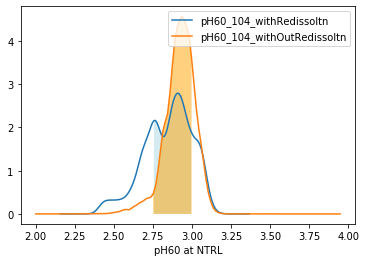

In [393]:
from sklearn.neighbors import KernelDensity

#convert the FeZn_104_withRedissoltn data to a form acceptable by the sklearn by doing this:
pH60_104_withRedissoltn_data = np.array(pH60_104_withRedissoltn.dropna()).reshape(-1,1)
pH60_104_withOutRedissoltn_data = np.array(pH60_104_withOutRedissoltn.dropna()).reshape(-1,1)

#create a KernelDensity using the sklearn
kd_pH60_104_withRedissoltn = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(pH60_104_withRedissoltn_data)
kd_pH60_104_withOutRedissoltn = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(pH60_104_withOutRedissoltn_data)    

def get_probability(start_value, end_value, eval_points, kd): #-----------------------------------function that computes the probability under a kernel density curve from a given KernelDensity
    
    # Number of evaluation points 
    N = eval_points                                      
    step = (end_value - start_value) / (N - 1)  # Step size

    x = np.linspace(start_value, end_value, N)[:, np.newaxis]  # Generate values in the range
    kd_vals = np.exp(kd.score_samples(x))  # Get PDF values for each x
    probability = np.sum(kd_vals * step)  # Approximate the integral of the PDF
    return probability.round(4)


#print out the results
print('The pH60 range 2.75 to 3.0 in NTRL make up {}% of the dataset when Redissolution occurred'.format(get_probability(2.75,3.0, 200,kd_pH60_104_withRedissoltn)*100))
print('The pH60 range 2.75 to 3.0 in NTRL make up {}% of the dataset when Redissolution did NOT occur'.format(get_probability(2.75,3.0, 200,kd_pH60_104_withOutRedissoltn)*100))


plt.close('all')
#plot for withRedissoltn
ax = sns.kdeplot(pH60_104_withRedissoltn, clip=(2,4), shade=False)
line = ax.get_lines()[-1]
x, y = line.get_data()
mask = (x <= 3.0) & ( x > 2.75)
x, y = x[mask], y[mask]
ax.fill_between(x, y1=y, alpha=0.5, facecolor='lightblue')

#plot for withOutRedissoltn
ax1 = sns.kdeplot(pH60_104_withOutRedissoltn, clip=(2,4), shade=False)
line = ax1.get_lines()[-1]
x, y = line.get_data()
mask = (x <= 3.0) & ( x > 2.75)
x, y = x[mask], y[mask]
ax1.fill_between(x, y1=y, alpha=0.5, facecolor='orange')

#
plt.legend(labels=['pH60_104_withRedissoltn','pH60_104_withOutRedissoltn'])
plt.xlabel('pH60 at NTRL')
plt.savefig(r'C:\Users\v.t.flores\Documents\pH60_104_Distribution_with_and_withOut_Redissolution_shaded_2.75to3.0.png')
plt.show()





In [394]:
pH60_104_range275_3 = DF_NTRL_TK0513_MSTK01_intrpltd[(DF_NTRL_TK0513_MSTK01_intrpltd['104_pH60']>2.75) & (DF_NTRL_TK0513_MSTK01_intrpltd['104_pH60']<=3.0)]
pH60_104_range275_3_with_RD = pH60_104_range2_29[pH60_104_range2_29['Zn_drop_act']<=0]
print('The probability that redissolution will occur for pH range 2.75 to 3.0 is: {}'.format(pH60_104_range275_3_with_RD.count()[-1]/pH60_104_range275_3.count()[-1]))
#print('')
      
#pH60_104_range2_25_withOut_RD = pH60_104_range2_25[pH60_104_range2_25['Zn_drop_act']>0]
#print(pH60_104_range2_25_withOut_RD.count()[-1])

The probability that redissolution will occur for pH range 2.75 to 3.0 is: 0.1675247696101761


In [381]:
listOfpHRange = np.linspace(2,4, 21)

In [389]:
# computing the probabilities of redissolution based on number of occurrence [pH60]

for pH in listOfpHRange:
    pH60_104_range = DF_NTRL_TK0513_MSTK01_intrpltd[(DF_NTRL_TK0513_MSTK01_intrpltd['104_pH60']> pH) & (DF_NTRL_TK0513_MSTK01_intrpltd['104_pH60']<=pH+0.1)]
    pH60_104_range_with_RD = pH60_104_range[pH60_104_range['Zn_drop_act']<=0]
    print('The probability that redissolution will occur for pH range {} to {} is: {}'.format(pH.round(2), (pH+0.1).round(2), pH60_104_range_with_RD.count()[-1]/pH60_104_range.count()[-1].round(4)))
    pHList.append(pH)
    

The probability that redissolution will occur for pH range 2.0 to 2.1 is: 0.0
The probability that redissolution will occur for pH range 2.1 to 2.2 is: 0.0
The probability that redissolution will occur for pH range 2.2 to 2.3 is: 0.5
The probability that redissolution will occur for pH range 2.3 to 2.4 is: 0.1
The probability that redissolution will occur for pH range 2.4 to 2.5 is: 0.8733624454148472
The probability that redissolution will occur for pH range 2.5 to 2.6 is: 0.5490196078431373
The probability that redissolution will occur for pH range 2.6 to 2.7 is: 0.5611111111111111
The probability that redissolution will occur for pH range 2.7 to 2.8 is: 0.4689989608590232
The probability that redissolution will occur for pH range 2.8 to 2.9 is: 0.163209992929531
The probability that redissolution will occur for pH range 2.9 to 3.0 is: 0.1254396248534584
The probability that redissolution will occur for pH range 3.0 to 3.1 is: 0.17085773337926283
The probability that redissolution wi

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  after removing the cwd from sys.path.


In [504]:
DF_NTRL_TK0513_MSTK01_intrpltd.columns

Index(['104_Pb', '104_Zn', '104_Cu', '104_Ni', '104_Co', '104_Fe', '104_Mn',
       '104_Cr', '104_Ca', '104_Si', '104_Al', '104_Mg', '104_Fe2', '104_pH60',
       '104_ORP', '104_NTU', '104_Ft', 'tk13_Zn', 'tk13_solids%', 'Zn_drop',
       'tk05_Al', 'tk05_Ca', 'tk05_Co', 'tk05_Cr', 'tk05_Cu', 'tk05_Fe',
       'tk05_Mg', 'tk05_Mn', 'tk05_Ni', 'tk05_Pb', 'tk05_Si', 'tk05_Zn',
       'DeZn_Feed_Flow', 'DeZn_Feed_T', 'H2S_FT_TK01_A', 'H2S_FT_TK01_B',
       'H2S_FT_TK02_A', 'H2S_FT_TK02_B', 'DeZn_Seed_Flow', 'DeZn_TK05_T',
       'H2S_tk01', 'H2S_tk02', 'Zn_drop_act', '104_AlMg_ratio',
       '104_FeNi_ratio', '104_FeZn_ratio'],
      dtype='object')

In [516]:
# computing the probabilities of redissolution based on number of occurrence [AlMg]
listOfAlMg = np.linspace(0,2, 11)
AlMgList = []
for AlMg in listOfAlMg:
    AlMg_104_range = DF_NTRL_TK0513_MSTK01_intrpltd[(DF_NTRL_TK0513_MSTK01_intrpltd['104_AlMg_ratio']> AlMg) & (DF_NTRL_TK0513_MSTK01_intrpltd['104_AlMg_ratio']<=AlMg+0.2)]
    AlMg_104_range_with_RD = AlMg_104_range[AlMg_104_range['Zn_drop_act']<=0]
    print('The probability that redissolution will occur for pH range {} to {} is: {}'.format(AlMg.round(2), (AlMg+0.2).round(2), AlMg_104_range_with_RD.count()[-1]/AlMg_104_range.count()[-1].round(4)))
    AlMgList.append(AlMg)   

The probability that redissolution will occur for pH range 0.0 to 0.2 is: 0.0
The probability that redissolution will occur for pH range 0.2 to 0.4 is: 0.040281579976535004
The probability that redissolution will occur for pH range 0.4 to 0.6 is: 0.20362072055924002
The probability that redissolution will occur for pH range 0.6 to 0.8 is: 0.207223113964687
The probability that redissolution will occur for pH range 0.8 to 1.0 is: 0.31905195989061075
The probability that redissolution will occur for pH range 1.0 to 1.2 is: 0.2051220679751077
The probability that redissolution will occur for pH range 1.2 to 1.4 is: 0.10850286906624934
The probability that redissolution will occur for pH range 1.4 to 1.6 is: 0.080370942812983
The probability that redissolution will occur for pH range 1.6 to 1.8 is: 0.06493506493506493
The probability that redissolution will occur for pH range 1.8 to 2.0 is: 0.0
The probability that redissolution will occur for pH range 2.0 to 2.2 is: 0.0


In [537]:
listOfFeNi = np.linspace(0,0.6, 13)
listOfFeNi

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 ])

In [538]:
# computing the probabilities of redissolution based on number of occurrence [FeNi]
FeNiList = []
for FeNi in listOfFeNi:
    FeNi_104_range = DF_NTRL_TK0513_MSTK01_intrpltd[(DF_NTRL_TK0513_MSTK01_intrpltd['104_FeNi_ratio']> FeNi) & (DF_NTRL_TK0513_MSTK01_intrpltd['104_FeNi_ratio']<=FeNi+0.05)]
    FeNi_104_range_with_RD = FeNi_104_range[FeNi_104_range['Zn_drop_act']<=0]
    print('The probability that redissolution will occur for FeNi range {} to {} is: {}'.format(FeNi.round(2), (FeNi+0.05).round(2), FeNi_104_range_with_RD.count()[-1]/FeNi_104_range.count()[-1].round(4)))
    FeNiList.append(FeNi)   

The probability that redissolution will occur for FeNi range 0.0 to 0.05 is: 0.0
The probability that redissolution will occur for FeNi range 0.05 to 0.1 is: 0.8785046728971962
The probability that redissolution will occur for FeNi range 0.1 to 0.15 is: 0.41275797373358347
The probability that redissolution will occur for FeNi range 0.15 to 0.2 is: 0.4671726755218216
The probability that redissolution will occur for FeNi range 0.2 to 0.25 is: 0.20637979019481908
The probability that redissolution will occur for FeNi range 0.25 to 0.3 is: 0.06659447753113157
The probability that redissolution will occur for FeNi range 0.3 to 0.35 is: 0.16484607745779542
The probability that redissolution will occur for FeNi range 0.35 to 0.4 is: 0.29030154849225753
The probability that redissolution will occur for FeNi range 0.4 to 0.45 is: 0.16718266253869968
The probability that redissolution will occur for FeNi range 0.45 to 0.5 is: 0.16163349347975292
The probability that redissolution will occur fo

In [ ]:
from sklearn.neighbors import KernelDensity

#convert the FeZn_104_withRedissoltn data to a form acceptable by the sklearn by doing this:
pH60_104_withRedissoltn_data = np.array(pH60_104_withRedissoltn.dropna()).reshape(-1,1)
pH60_104_withOutRedissoltn_data = np.array(pH60_104_withOutRedissoltn.dropna()).reshape(-1,1)

#create a KernelDensity using the sklearn
kd_pH60_104_withRedissoltn = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(pH60_104_withRedissoltn_data)
kd_pH60_104_withOutRedissoltn = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(pH60_104_withOutRedissoltn_data)    

def get_probability(start_value, end_value, eval_points, kd): #-----------------------------------function that computes the probability under a kernel density curve from a given KernelDensity
    
    # Number of evaluation points 
    N = eval_points                                      
    step = (end_value - start_value) / (N - 1)  # Step size

    x = np.linspace(start_value, end_value, N)[:, np.newaxis]  # Generate values in the range
    kd_vals = np.exp(kd.score_samples(x))  # Get PDF values for each x
    probability = np.sum(kd_vals * step)  # Approximate the integral of the PDF
    return probability.round(4)


#print out the results
print('The pH60 range 2.75 to 3.0 in NTRL make up {}% of the dataset when Redissolution occurred'.format(get_probability(2.75,3.0, 200,kd_pH60_104_withRedissoltn)*100))
print('The pH60 range 2.75 to 3.0 in NTRL make up {}% of the dataset when Redissolution did NOT occur'.format(get_probability(2.75,3.0, 200,kd_pH60_104_withOutRedissoltn)*100))


plt.close('all')
#plot for withRedissoltn
ax = sns.kdeplot(pH60_104_withRedissoltn, clip=(2,4), shade=False)
line = ax.get_lines()[-1]
x, y = line.get_data()
mask = (x <= 3.0) & ( x > 2.75)
x, y = x[mask], y[mask]
ax.fill_between(x, y1=y, alpha=0.5, facecolor='lightblue')

#plot for withOutRedissoltn
ax1 = sns.kdeplot(pH60_104_withOutRedissoltn, clip=(2,4), shade=False)
line = ax1.get_lines()[-1]
x, y = line.get_data()
mask = (x <= 3.0) & ( x > 2.75)
x, y = x[mask], y[mask]
ax1.fill_between(x, y1=y, alpha=0.5, facecolor='orange')

#
plt.legend(labels=['pH60_104_withRedissoltn','pH60_104_withOutRedissoltn'])
plt.xlabel('pH60 at NTRL')
plt.savefig(r'C:\Users\v.t.flores\Documents\pH60_104_Distribution_with_and_withOut_Redissolution_shaded_2.75to3.0.png')
plt.show()





In [397]:
listOfFeZn = np.linspace(0,30, 31)
for FeZn in listOfFeZn:
    FeZn_104_range = DF_NTRL_TK0513_MSTK01_intrpltd[(DF_NTRL_TK0513_MSTK01_intrpltd['104_FeZn_ratio']> FeZn) & (DF_NTRL_TK0513_MSTK01_intrpltd['104_FeZn_ratio']<=FeZn+1.0)]
    FeZn_104_range_with_RD = FeZn_104_range[FeZn_104_range['Zn_drop_act']<=0]
    print('The probability that redissolution will occur for pH range {} to {} is: {}'.format(FeZn.round(2), (FeZn+1.0).round(2), FeZn_104_range_with_RD.count()[-1]/FeZn_104_range.count()[-1].round(4)))
    

The probability that redissolution will occur for pH range 0.0 to 1.0 is: 0.0
The probability that redissolution will occur for pH range 1.0 to 2.0 is: 0.0
The probability that redissolution will occur for pH range 2.0 to 3.0 is: 0.4444444444444444
The probability that redissolution will occur for pH range 3.0 to 4.0 is: 0.8666666666666667
The probability that redissolution will occur for pH range 4.0 to 5.0 is: 0.6301369863013698
The probability that redissolution will occur for pH range 5.0 to 6.0 is: 0.3893129770992366
The probability that redissolution will occur for pH range 6.0 to 7.0 is: 0.32432432432432434
The probability that redissolution will occur for pH range 7.0 to 8.0 is: 0.35568862275449104
The probability that redissolution will occur for pH range 8.0 to 9.0 is: 0.45938864628820963
The probability that redissolution will occur for pH range 9.0 to 10.0 is: 0.258147512864494
The probability that redissolution will occur for pH range 10.0 to 11.0 is: 0.09813084112149532
T

In [406]:
# Compute the probability of redissolution by counting the total number of redissolution occurence while under the specific FeZn ratio divided  by the total number of 
# occurence when the FeZn ration values where in the specific range

FeZn_104_range = DF_NTRL_TK0513_MSTK01_intrpltd[(DF_NTRL_TK0513_MSTK01_intrpltd['104_FeZn_ratio']> 10) & (DF_NTRL_TK0513_MSTK01_intrpltd['104_FeZn_ratio']<= 13)]
FeZn_104_range_with_RD = FeZn_104_range[FeZn_104_range['Zn_drop_act']<=0]
print('The probability that redissolution will occur for FeZn_104_range {} to {} is: {}'.format(10, 13, FeZn_104_range_with_RD.count()[-1]/FeZn_104_range.count()[-1].round(4)))
    

The probability that redissolution will occur for FeZn_104_range 10 to 13 is: 0.12039390088945362


The number of instances FeZn_104_withRedissoltn : 6546
The number of instances FeZN_104_withOutRedissoltn : 25821


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


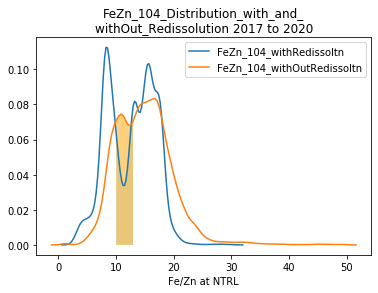

The FeZn ratio range 10 to 13 in NTRL make up 13.950000000000001% of the dataset when Redissolution occurred
The FeZn ratio range 10 to 13 in NTRL make up 21.46% of the dataset when Redissolution did NOT occur


In [407]:
FeZn_104_withRedissoltn = DF_NTRL_TK0513_MSTK01_intrpltd[DF_NTRL_TK0513_MSTK01_intrpltd['Zn_drop_act']<=0]['104_FeZn_ratio']
FeZn_104_withOutRedissoltn = DF_NTRL_TK0513_MSTK01_intrpltd[DF_NTRL_TK0513_MSTK01_intrpltd['Zn_drop_act']>0]['104_FeZn_ratio']

print('The number of instances FeZn_104_withRedissoltn : {}'.format(FeZn_104_withRedissoltn.count()))
print('The number of instances FeZN_104_withOutRedissoltn : {}'.format(FeZn_104_withOutRedissoltn.count()))


#convert the FeZn_104_withRedissoltn data to a form acceptable by the sklearn by doing this:
FeZn_104_withRedissoltn_data = np.array(FeZn_104_withRedissoltn.dropna()).reshape(-1,1)
FeZn_104_withOutRedissoltn_data = np.array(FeZn_104_withOutRedissoltn.dropna()).reshape(-1,1)

#create a KernelDensity using the sklearn
kd_FeZn_104_withRedissoltn = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(FeZn_104_withRedissoltn_data)
kd_FeZn_104_withOutRedissoltn = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(FeZn_104_withOutRedissoltn_data)    


def get_probability(start_value, end_value, eval_points, kd): #-----------------------------------function that computes the probability under a kernel density curve from a given KernelDensity
    
    # Number of evaluation points 
    N = eval_points                                      
    step = (end_value - start_value) / (N - 1)  # Step size

    x = np.linspace(start_value, end_value, N)[:, np.newaxis]  # Generate values in the range
    kd_vals = np.exp(kd.score_samples(x))  # Get PDF values for each x
    probability = np.sum(kd_vals * step)  # Approximate the integral of the PDF
    return probability.round(4)

plt.close('all')

ax = sns.kdeplot(FeZn_104_withRedissoltn, clip=(0,50), shade=False)

line = ax.get_lines()[-1]
x, y = line.get_data()
mask = (x > 10) & (x <= 13)
x, y = x[mask], y[mask]
ax.fill_between(x, y1=y, alpha=0.5, facecolor='lightblue')

ax = sns.kdeplot(FeZn_104_withOutRedissoltn, clip=(0,50), shade=False)
line = ax.get_lines()[-1]
x, y = line.get_data()
mask = (x > 10) & (x <= 13)
x, y = x[mask], y[mask]
ax.fill_between(x, y1=y, alpha=0.5, facecolor='orange')

#
plt.legend(labels=['FeZn_104_withRedissoltn','FeZn_104_withOutRedissoltn'])
plt.xlabel('Fe/Zn at NTRL')
plt.title('FeZn_104_Distribution_with_and_\nwithOut_Redissolution 2017 to 2020')
plt.savefig(r'C:\Users\v.t.flores\Documents\FeZn_104_Distribution_with_and_withOut_Redissolution_shaded10to13.png')
plt.show()

print('The FeZn ratio range 10 to 13 in NTRL make up {}% of the dataset when Redissolution occurred'.format(get_probability(10,13, 200,kd_FeZn_104_withRedissoltn)*100))
print('The FeZn ratio range 10 to 13 in NTRL make up {}% of the dataset when Redissolution did NOT occur'.format(get_probability(10,13, 200,kd_FeZn_104_withOutRedissoltn)*100))

In [473]:
def createDistPlotShaded(df_column1, df_column2, clipStart, clipEnd, x_rangeStart, x_rangeEnd, kde1_name, kde2_name, xLabel, pltTitle, fileAddress):

    #create the distplot and the shaded area
    plt.close('all')
    #create the first kde plot
    rcParams['figure.figsize'] = 10, 7
    ax = sns.kdeplot(df_column1, clip=(clipStart,clipEnd), shade=False)

    line = ax.get_lines()[-1]
    x, y = line.get_data()
    mask = (x > x_rangeStart) & (x <= x_rangeEnd)
    x, y = x[mask], y[mask]
    ax.fill_between(x, y1=y, alpha=0.5, facecolor='lightblue')

    #create the second kde plot on the same chart as the first kde plot
    ax = sns.kdeplot(df_column2, clip=(clipStart,clipEnd), shade=False)
    line = ax.get_lines()[-1]
    x, y = line.get_data()
    mask = (x > x_rangeStart) & (x <= x_rangeEnd)
    x, y = x[mask], y[mask]
    ax.fill_between(x, y1=y, alpha=0.3, facecolor='orange')
    #
    plt.legend(labels=[kde1_name,kde2_name])
    plt.xlabel(xLabel)
    plt.title(pltTitle)
    
    if fileAddress == None:
        pass
    else:
        plt.savefig(fileAddress)


In [484]:
def get_probability(start_value, end_value, eval_points, kd): #-----------------------------------function that computes the probability under a kernel density curve from a given KernelDensity
    
    # Number of evaluation points 
    N = eval_points                                      
    step = (end_value - start_value) / (N - 1)  # Step size

    x = np.linspace(start_value, end_value, N)[:, np.newaxis]  # Generate values in the range
    kd_vals = np.exp(kd.score_samples(x))  # Get PDF values for each x
    probability = np.sum(kd_vals * step)  # Approximate the integral of the PDF
    return probability.round(4)

def reportPercentOfTheDataSet(df_column1, rangeStart, rangeEnd, ParameterName):
        #convert the FeZn_104_withRedissoltn data to a form acceptable by the sklearn by doing this:
    df_column1_data = np.array(df_column1.dropna()).reshape(-1,1)

    #create a KernelDensity using the sklearn
    kd_column1_data = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(df_column1_data)
    
    print('The {} range {} to {} in NTRL make up {}% of the dataset'.format(ParameterName, rangeStart, rangeEnd, (get_probability(rangeStart,rangeEnd, 1000,kd_column1_data)*100).round(4)))

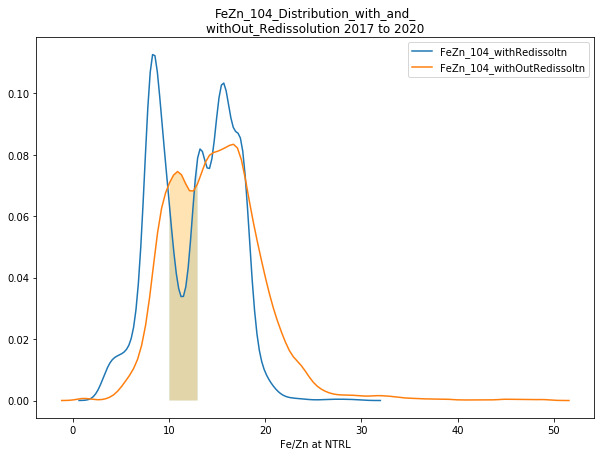

In [474]:
#Create a distplot for FeZn Ratio for with and without Zn redissolution cases

df_column1 = FeZn_104_withRedissoltn
df_column2 = FeZn_104_withOutRedissoltn
clipStart = 0
clipEnd = 50
x_rangeStart = 10
x_rangeEnd = 13
kde1_name = 'FeZn_104_withRedissoltn'
kde2_name = 'FeZn_104_withOutRedissoltn'
xLabel = 'Fe/Zn at NTRL'
pltTitle = 'FeZn_104_Distribution_with_and_\nwithOut_Redissolution 2017 to 2020'
#fileAddress = r'C:\Users\v.t.flores\Documents\testPlot2.png'
fileAddress = None
    
createDistPlotShaded(df_column1, df_column2, clipStart, clipEnd, x_rangeStart, x_rangeEnd, kde1_name, kde2_name, xLabel, pltTitle, fileAddress)

In [460]:
x_rangeStart = 10
x_rangeEnd = 13


#Report the fraction of the data inside the shaded region. In this case, the entire dataset for FeZn ratio where zinc redissolution occurred and the shaded region is the range 10 to 13 of the x-axis
reportPercentOfTheDataSet(FeZn_104_withRedissoltn, x_rangeStart, x_rangeEnd, 'FeZn ratio')
reportPercentOfTheDataSet(FeZn_104_withRedissoltn, 0, 20, 'FeZn ratio')

The FeZn ratio range 10 to 13 in NTRL make up 13.95% of the dataset
The FeZn ratio range 0 to 20 in NTRL make up 98.86% of the dataset


In [462]:
# Compute the probability of redissolution by counting the total number of redissolution occurence while under the specific AlMg ratio divided  by the total number of 
# occurence when the AlMg ration values where in the specific range

AlMg_104_range = DF_NTRL_TK0513_MSTK01_intrpltd[(DF_NTRL_TK0513_MSTK01_intrpltd['104_AlMg_ratio']> 10) & (DF_NTRL_TK0513_MSTK01_intrpltd['104_AlMg_ratio']<= 13)]
AlMg_104_range_with_RD = AlMg_104_range[AlMg_104_range['Zn_drop_act']<=0]
print('The probability that redissolution will occur for AlMg_104_range {} to {} is: {}'.format(10, 13, AlMg_104_range_with_RD.count()[-1]/AlMg_104_range.count()[-1].round(4)))
    

The probability that redissolution will occur for AlMg_104_range 10 to 13 is: 0.0


In [539]:
DF_NTRL_TK0513_MSTK01_intrpltd.columns

Index(['104_Pb', '104_Zn', '104_Cu', '104_Ni', '104_Co', '104_Fe', '104_Mn',
       '104_Cr', '104_Ca', '104_Si', '104_Al', '104_Mg', '104_Fe2', '104_pH60',
       '104_ORP', '104_NTU', '104_Ft', 'tk13_Zn', 'tk13_solids%', 'Zn_drop',
       'tk05_Al', 'tk05_Ca', 'tk05_Co', 'tk05_Cr', 'tk05_Cu', 'tk05_Fe',
       'tk05_Mg', 'tk05_Mn', 'tk05_Ni', 'tk05_Pb', 'tk05_Si', 'tk05_Zn',
       'DeZn_Feed_Flow', 'DeZn_Feed_T', 'H2S_FT_TK01_A', 'H2S_FT_TK01_B',
       'H2S_FT_TK02_A', 'H2S_FT_TK02_B', 'DeZn_Seed_Flow', 'DeZn_TK05_T',
       'H2S_tk01', 'H2S_tk02', 'Zn_drop_act', '104_AlMg_ratio',
       '104_FeNi_ratio', '104_FeZn_ratio'],
      dtype='object')

In [579]:
#Create a distplot for AlMg Ratio for with and without Zn redissolution cases
Fe_104_withRedissoltn = DF_NTRL_TK0513_MSTK01_intrpltd[DF_NTRL_TK0513_MSTK01_intrpltd['Zn_drop_act']<=0]['104_Fe']
Fe_104_withOutRedissoltn = DF_NTRL_TK0513_MSTK01_intrpltd[DF_NTRL_TK0513_MSTK01_intrpltd['Zn_drop_act']>0]['104_Fe']

df_column1 = Fe_104_withRedissoltn
df_column2 = Fe_104_withOutRedissoltn
clipStart = 0
clipEnd = 2.5
x_rangeStart = 0.0
x_rangeEnd = 0.0
kde1_name = 'Fe_104_withRedissoltn'
kde2_name = 'Fe_104_withOutRedissoltn'
xLabel = 'Fe at NTRL'
pltTitle = 'Fe_104_Distribution_with_and_\nwithOut_Redissolution 2017 to 2020'
fileAddress = r'C:\Users\v.t.flores\Documents\Fe_104_Distribution_with_and_withOut_Redissolution_test.png'
#fileAddress = None 
    
createDistPlotShaded(Fe_104_withRedissoltn, Fe_104_withOutRedissoltn, clipStart, clipEnd, x_rangeStart, x_rangeEnd, kde1_name, kde2_name, xLabel, pltTitle, fileAddress)



# computing the probabilities of redissolution based on number of occurrence [Fe]
listOfFe = np.linspace(0,2.5, 11)
FeList = []
Fe_redissltn_prob = []
for Fe in listOfFe:
    Fe_104_range = DF_NTRL_TK0513_MSTK01_intrpltd[(DF_NTRL_TK0513_MSTK01_intrpltd['104_Fe']> Fe) & (DF_NTRL_TK0513_MSTK01_intrpltd['104_Fe']<=Fe+0.25)]
    Fe_104_range_with_RD = FeNi_104_range[FeNi_104_range['Zn_drop_act']<=0]
    probability = (Fe_104_range_with_RD.count()[-1]/Fe_104_range.count()[-1]).round(4)
    print('The probability that redissolution will occur for Fe range {} to {} is: {}. This range occurred {} times'.format(Fe.round(2), (Fe+0.25).round(2), \
                                                                                                                     probability, \
                                                                                                                      Fe_104_range.count()[-1]))
    FeList.append(str(Fe) +" to "+str(Fe+.05))
    Fe_redissltn_prob.append(probability)

The probability that redissolution will occur for Fe range 0.0 to 0.25 is: 0.2. This range occurred 30 times
The probability that redissolution will occur for Fe range 0.25 to 0.5 is: 0.0118. This range occurred 507 times
The probability that redissolution will occur for Fe range 0.5 to 0.75 is: 0.0015. This range occurred 4036 times
The probability that redissolution will occur for Fe range 0.75 to 1.0 is: 0.0009. This range occurred 6319 times
The probability that redissolution will occur for Fe range 1.0 to 1.25 is: 0.0009. This range occurred 6868 times
The probability that redissolution will occur for Fe range 1.25 to 1.5 is: 0.0008. This range occurred 7297 times
The probability that redissolution will occur for Fe range 1.5 to 1.75 is: 0.0013. This range occurred 4510 times
The probability that redissolution will occur for Fe range 1.75 to 2.0 is: 0.0037. This range occurred 1634 times
The probability that redissolution will occur for Fe range 2.0 to 2.25 is: 0.0104. This range 

In [581]:
Fe_probability_list_pair = list(zip(FeList, Fe_redissltn_prob))
Fe_probability_list_pair_df = pd.DataFrame(Fe_probability_list_pair)
Fe_probability_list_pair_df_1 = Fe_probability_list_pair_df.drop(Fe_probability_list_pair_df.index[0])

fileAddress = r'C:\Users\v.t.flores\Documents\Fe_104_Redissolution_probability.png'

rcParams['figure.figsize'] = 12, 8
Fe_probability_list_pair_df_1.columns = ['104_Fe_Range', 'Probability_to_Redissolve']
ax_Fe = sns.lineplot(data=Fe_probability_list_pair_df_1, x="104_Fe_Range", y="Probability_to_Redissolve", marker='o')
plt.title('Probability of Redissolution for a given Fe Range at NTRL')

ax_Fe.set_xticklabels(Fe_probability_list_pair_df_1['104_Fe_Range'], rotation=45)
plt.savefig(fileAddress)

In [585]:



def createAProbabilityplot(df, colname, interval_List, increment, plot_title, columntitles, fileAddress):
    # this creates a plot for the probability of redissolution from a range of values of parameters like pH or FeNi ratio
    # df is the dataframe of containing all the parameters including the zn drop values. This the dataframe that will be sliced and filtered for the specific range that we're interested in
    # colname is a string value of the column name like '104_Fe'. This will be the name used to select the column from the df.
    # interval_List is the list of values of the parameter of interest. We will loop through this list and added by the increment value to compute the probability over a range of parameter value
    #
    #
    rcParams['figure.figsize'] = 12, 8
    listOf = interval_List
    ParamList = []
    Param_redissltn_prob = []
    for Param in interval_List:
        _104_range = df[(df[colname]> Param) & (df[colname]<=Param+increment)]
        _104_range_with_RD = _104_range[_104_range['Zn_drop_act']<=0]
        probability = (_104_range_with_RD.count()[-1]/_104_range.count()[-1]).round(4)
        print('The probability that redissolution will occur for range {} to {} is: {}. This range occurred {} times'.format(Param.round(2), (Param+increment).round(2), \
                                                                                                                         probability, \
                                                                                                                          _104_range.count()[-1]))
        ParamList.append(str(Param) +" to "+str(Param+increment))
        Param_redissltn_prob.append(probability)
                
        _probability_list_pair = list(zip(ParamList, Param_redissltn_prob))
    
    probability_list_pair_df = pd.DataFrame(_probability_list_pair) #Convert the zipped list pair to a dataframe
    probability_list_pair_df.columns = columntitles # Assign names to the columns
    
    ax_ = sns.lineplot(data=  probability_list_pair_df, x= columntitles[0], y= columntitles[1], marker='o')
    plt.title(plot_title)

    ax_.set_xticklabels(probability_list_pair_df[columntitles[0]], rotation=45)
    plt.savefig(fileAddress)


The probability that redissolution will occur for range 0.0 to 50.0 is: 0.1536. This range occurred 2968 times
The probability that redissolution will occur for range 100.0 to 150.0 is: 0.2091. This range occurred 4654 times
The probability that redissolution will occur for range 200.0 to 250.0 is: 0.4625. This range occurred 813 times
The probability that redissolution will occur for range 300.0 to 350.0 is: 0.6645. This range occurred 465 times
The probability that redissolution will occur for range 400.0 to 450.0 is: 0.3855. This range occurred 454 times
The probability that redissolution will occur for range 500.0 to 550.0 is: 0.632. This range occurred 250 times
The probability that redissolution will occur for range 600.0 to 650.0 is: 0.5035. This range occurred 141 times
The probability that redissolution will occur for range 700.0 to 750.0 is: 0.5656. This range occurred 122 times
The probability that redissolution will occur for range 800.0 to 850.0 is: 0.4819. This range occu

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in longlong_scalars
  from ipykernel import kernelapp as app


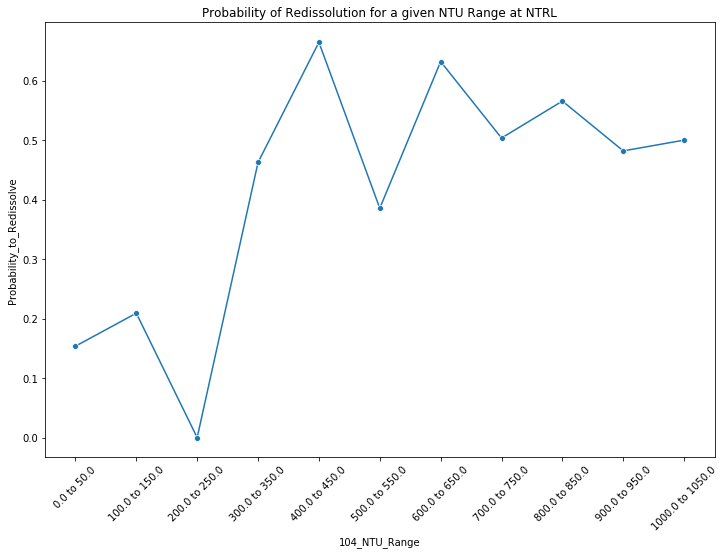

In [595]:
df = DF_NTRL_TK0513_MSTK01_intrpltd
colname = '104_NTU'
interval_List = np.linspace(0,1400, 15)
increment = 50
plot_title = 'Probability of Redissolution for a given NTU Range at NTRL'
columntitles = ['104_NTU_Range', 'Probability_to_Redissolve']
fileAddress = r'C:\Users\v.t.flores\Documents\NTU_104_Redissolution_probability.png'

createAProbabilityplot(df,colname, interval_List, increment, plot_title, columntitles,fileAddress)

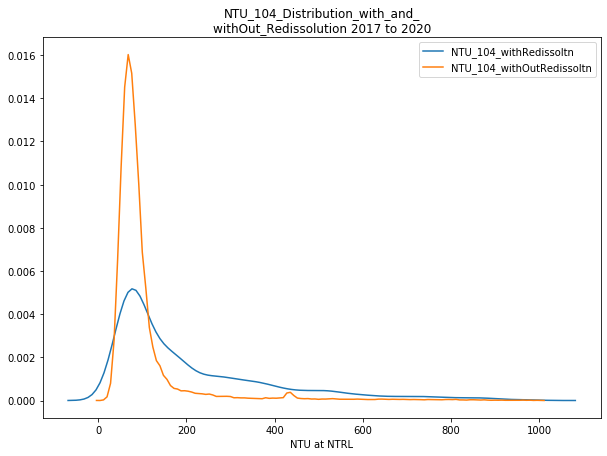

In [597]:
#Create a distplot for NTU for with and without Zn redissolution cases

NTU_104_withRedissoltn = DF_NTRL_TK0513_MSTK01_intrpltd[DF_NTRL_TK0513_MSTK01_intrpltd['Zn_drop_act']<=0]['104_NTU']
NTU_104_withOutRedissoltn = DF_NTRL_TK0513_MSTK01_intrpltd[DF_NTRL_TK0513_MSTK01_intrpltd['Zn_drop_act']>0]['104_NTU']

df_column1 = NTU_104_withRedissoltn
df_column2 = NTU_104_withOutRedissoltn
clipStart = 0
clipEnd = 1000
x_rangeStart = 0
x_rangeEnd = 0.1
kde1_name = 'NTU_104_withRedissoltn'
kde2_name = 'NTU_104_withOutRedissoltn'
xLabel = 'NTU at NTRL'
pltTitle = 'NTU_104_Distribution_with_and_\nwithOut_Redissolution 2017 to 2020'
fileAddress = r'C:\Users\v.t.flores\Documents\NTU_104_Distribution_with_and_withOut_Redissolution.png'
#fileAddress = None
    
createDistPlotShaded(df_column1, df_column2, clipStart, clipEnd, x_rangeStart, x_rangeEnd, kde1_name, kde2_name, xLabel, pltTitle, fileAddress)

The number of instances AlMg_104_withRedissoltn : 6546
The number of instances AlMg_104_withOutRedissoltn : 25821


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


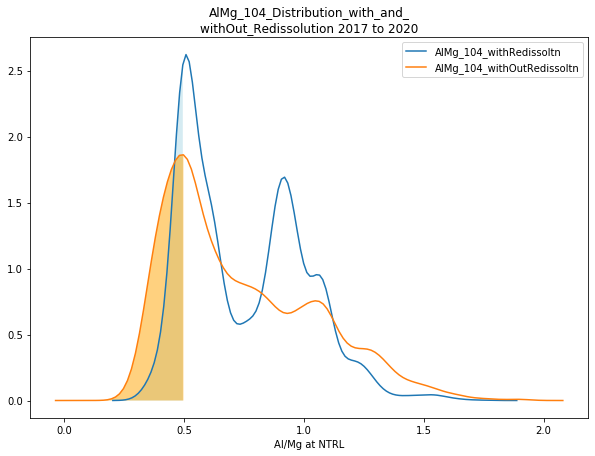

The AlMg ratio range 0 to 1 in NTRL make up 24.15% of the dataset when Redissolution occurred
The AlMg ratio range 0 to 1 in NTRL make up 24.87% of the dataset when Redissolution did NOT occur


In [503]:
AlMg_104_withRedissoltn = DF_NTRL_TK0513_MSTK01_intrpltd[DF_NTRL_TK0513_MSTK01_intrpltd['Zn_drop_act']<=0]['104_AlMg_ratio']
AlMg_104_withOutRedissoltn = DF_NTRL_TK0513_MSTK01_intrpltd[DF_NTRL_TK0513_MSTK01_intrpltd['Zn_drop_act']>0]['104_AlMg_ratio']

print('The number of instances AlMg_104_withRedissoltn : {}'.format(AlMg_104_withRedissoltn.count()))
print('The number of instances AlMg_104_withOutRedissoltn : {}'.format(AlMg_104_withOutRedissoltn.count()))


#convert the FeZn_104_withRedissoltn data to a form acceptable by the sklearn by doing this:
AlMg_104_withRedissoltn_data = np.array(AlMg_104_withRedissoltn.dropna()).reshape(-1,1)
AlMg_104_withOutRedissoltn_data = np.array(AlMg_104_withOutRedissoltn.dropna()).reshape(-1,1)

#create a KernelDensity using the sklearn
kd_AlMg_104_withRedissoltn = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(AlMg_104_withRedissoltn_data)
kd_AlMg_104_withOutRedissoltn = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(AlMg_104_withOutRedissoltn_data)    




ax = sns.kdeplot(AlMg_104_withRedissoltn, clip=(0,2), shade=False)

line = ax.get_lines()[-1]
x, y = line.get_data()
mask = (x > 0) & (x <= .5)
x, y = x[mask], y[mask]
ax.fill_between(x, y1=y, alpha=0.5, facecolor='lightblue')

ax = sns.kdeplot(AlMg_104_withOutRedissoltn, clip=(0,2), shade=False)
line = ax.get_lines()[-1]
x, y = line.get_data()
mask = (x > 0) & (x <= .5)
x, y = x[mask], y[mask]
ax.fill_between(x, y1=y, alpha=0.5, facecolor='orange')

#
plt.legend(labels=['AlMg_104_withRedissoltn','AlMg_104_withOutRedissoltn'])
plt.xlabel('Al/Mg at NTRL')
plt.title('AlMg_104_Distribution_with_and_\nwithOut_Redissolution 2017 to 2020')
#plt.savefig(r'C:\Users\v.t.flores\Documents\FeZn_104_Distribution_with_and_withOut_Redissolution_shaded10to13.png')
plt.show()

print('The AlMg ratio range {} to {} in NTRL make up {}% of the dataset when Redissolution occurred'.format(0,1,get_probability(0,.5, 200,kd_AlMg_104_withRedissoltn)*100))
print('The AlMg ratio range {} to {} in NTRL make up {}% of the dataset when Redissolution did NOT occur'.format(0,1,get_probability(0,.5, 200,kd_AlMg_104_withOutRedissoltn)*100))




In [ ]:
#Create a distplot for AlMg Ratio for with and without Zn redissolution cases

df_column1 = AlMg_104_withRedissoltn
df_column2 = AlMg_104_withOutRedissoltn
clipStart = 0
clipEnd = 3
x_rangeStart = 0.0
x_rangeEnd = .3
kde1_name = 'AlMg_104_withRedissoltn'
kde2_name = 'AlMg_104_withOutRedissoltn'
xLabel = 'Al/Mg at NTRL'
pltTitle = 'AlMg_104_Distribution_with_and_\nwithOut_Redissolution 2017 to 2020'
#fileAddress = r'C:\Users\v.t.flores\Documents\testPlot3AlMg.png'
fileAddress = None 
    
createDistPlotShaded(AlMg_104_withRedissoltn, AlMg_104_withOutRedissoltn, clipStart, clipEnd, x_rangeStart, x_rangeEnd, kde1_name, kde2_name, xLabel, pltTitle, fileAddress)

#Report the fraction of the data inside the shaded region. In this case, the entire dataset for FeZn ratio where zinc redissolution occurred and the shaded region is the range 10 to 13 of the x-axis
reportPercentOfTheDataSet(AlMg_104_withRedissoltn, x_rangeStart, x_rangeEnd, 'AlMg ratio')
reportPercentOfTheDataSet(AlMg_104_withOutRedissoltn, x_rangeStart, x_rangeEnd, 'AlMg ratio')